# Regression model: Predciting house prices

In [37]:
# Importing the necessary packages

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

import seaborn as sns
%matplotlib inline

In [38]:
# Loading the data
df = pd.read_csv("regression_housedata.csv", sep=';', decimal=',', header=0, names=None)

In [39]:
df.head()

,id,bedrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,price
0,7129300520,3,1180,5650,1,1180,0,221900
1,6414100192,3,2570,7242,2,2170,400,538000
2,5631500400,2,770,10000,1,770,0,180000
3,2487200875,4,1960,5000,1,1050,910,604000
4,1954400510,3,1680,8080,1,1680,0,510000


In [40]:
# Getting info about data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             999 non-null    int64 
 1   bedrooms       999 non-null    int64 
 2   sqft_living    999 non-null    int64 
 3   sqft_lot       999 non-null    int64 
 4   floors         999 non-null    int64 
 5   sqft_above     999 non-null    int64 
 6   sqft_basement  999 non-null    int64 
 7   price          999 non-null    object
dtypes: int64(7), object(1)
memory usage: 62.6+ KB
None


In [41]:
df.isnull().sum()

id               0
bedrooms         0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
sqft_basement    0
price            0
dtype: int64

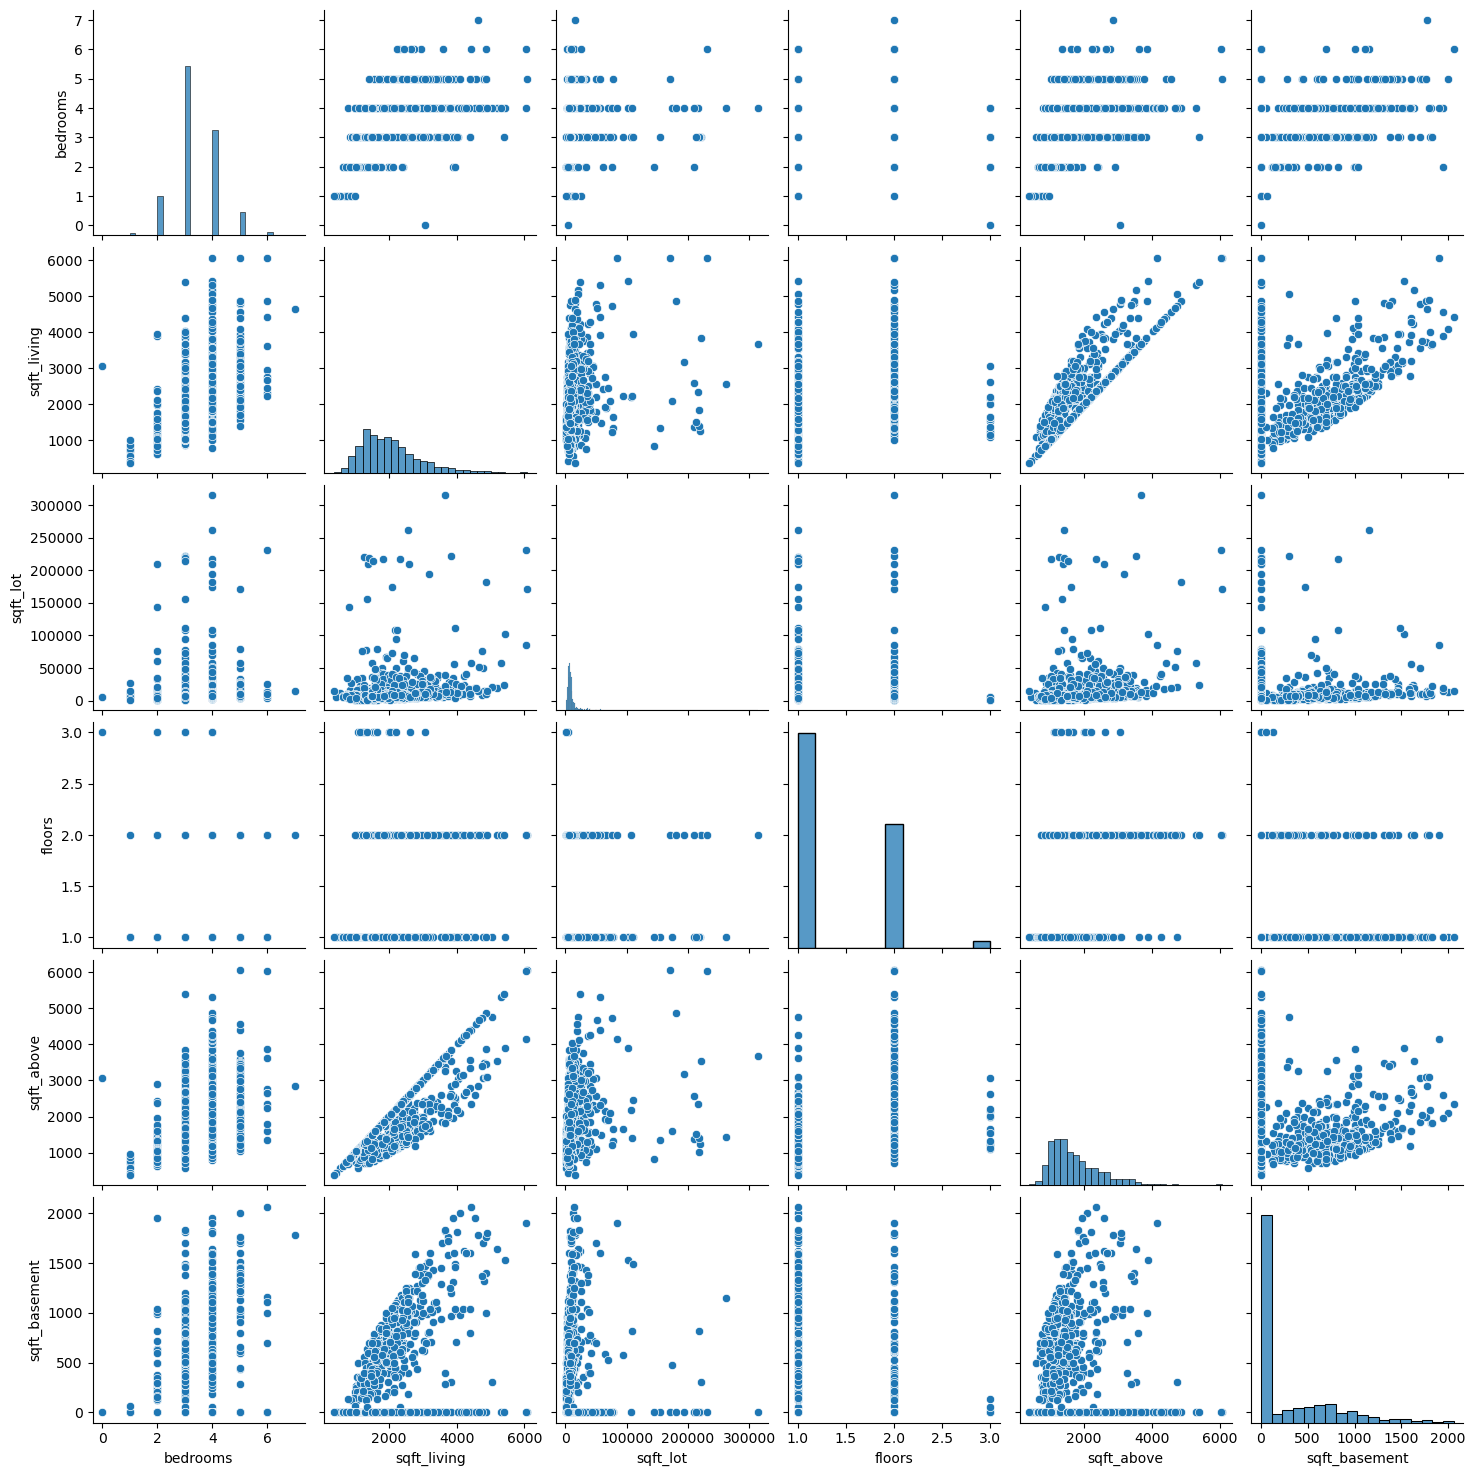

In [42]:
# Performing exploratory data analysis (EDA)

# Selecting the columns of interest
selected_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'price']

# Creating a pairplot
sns.pairplot(df[selected_columns])
plt.show()


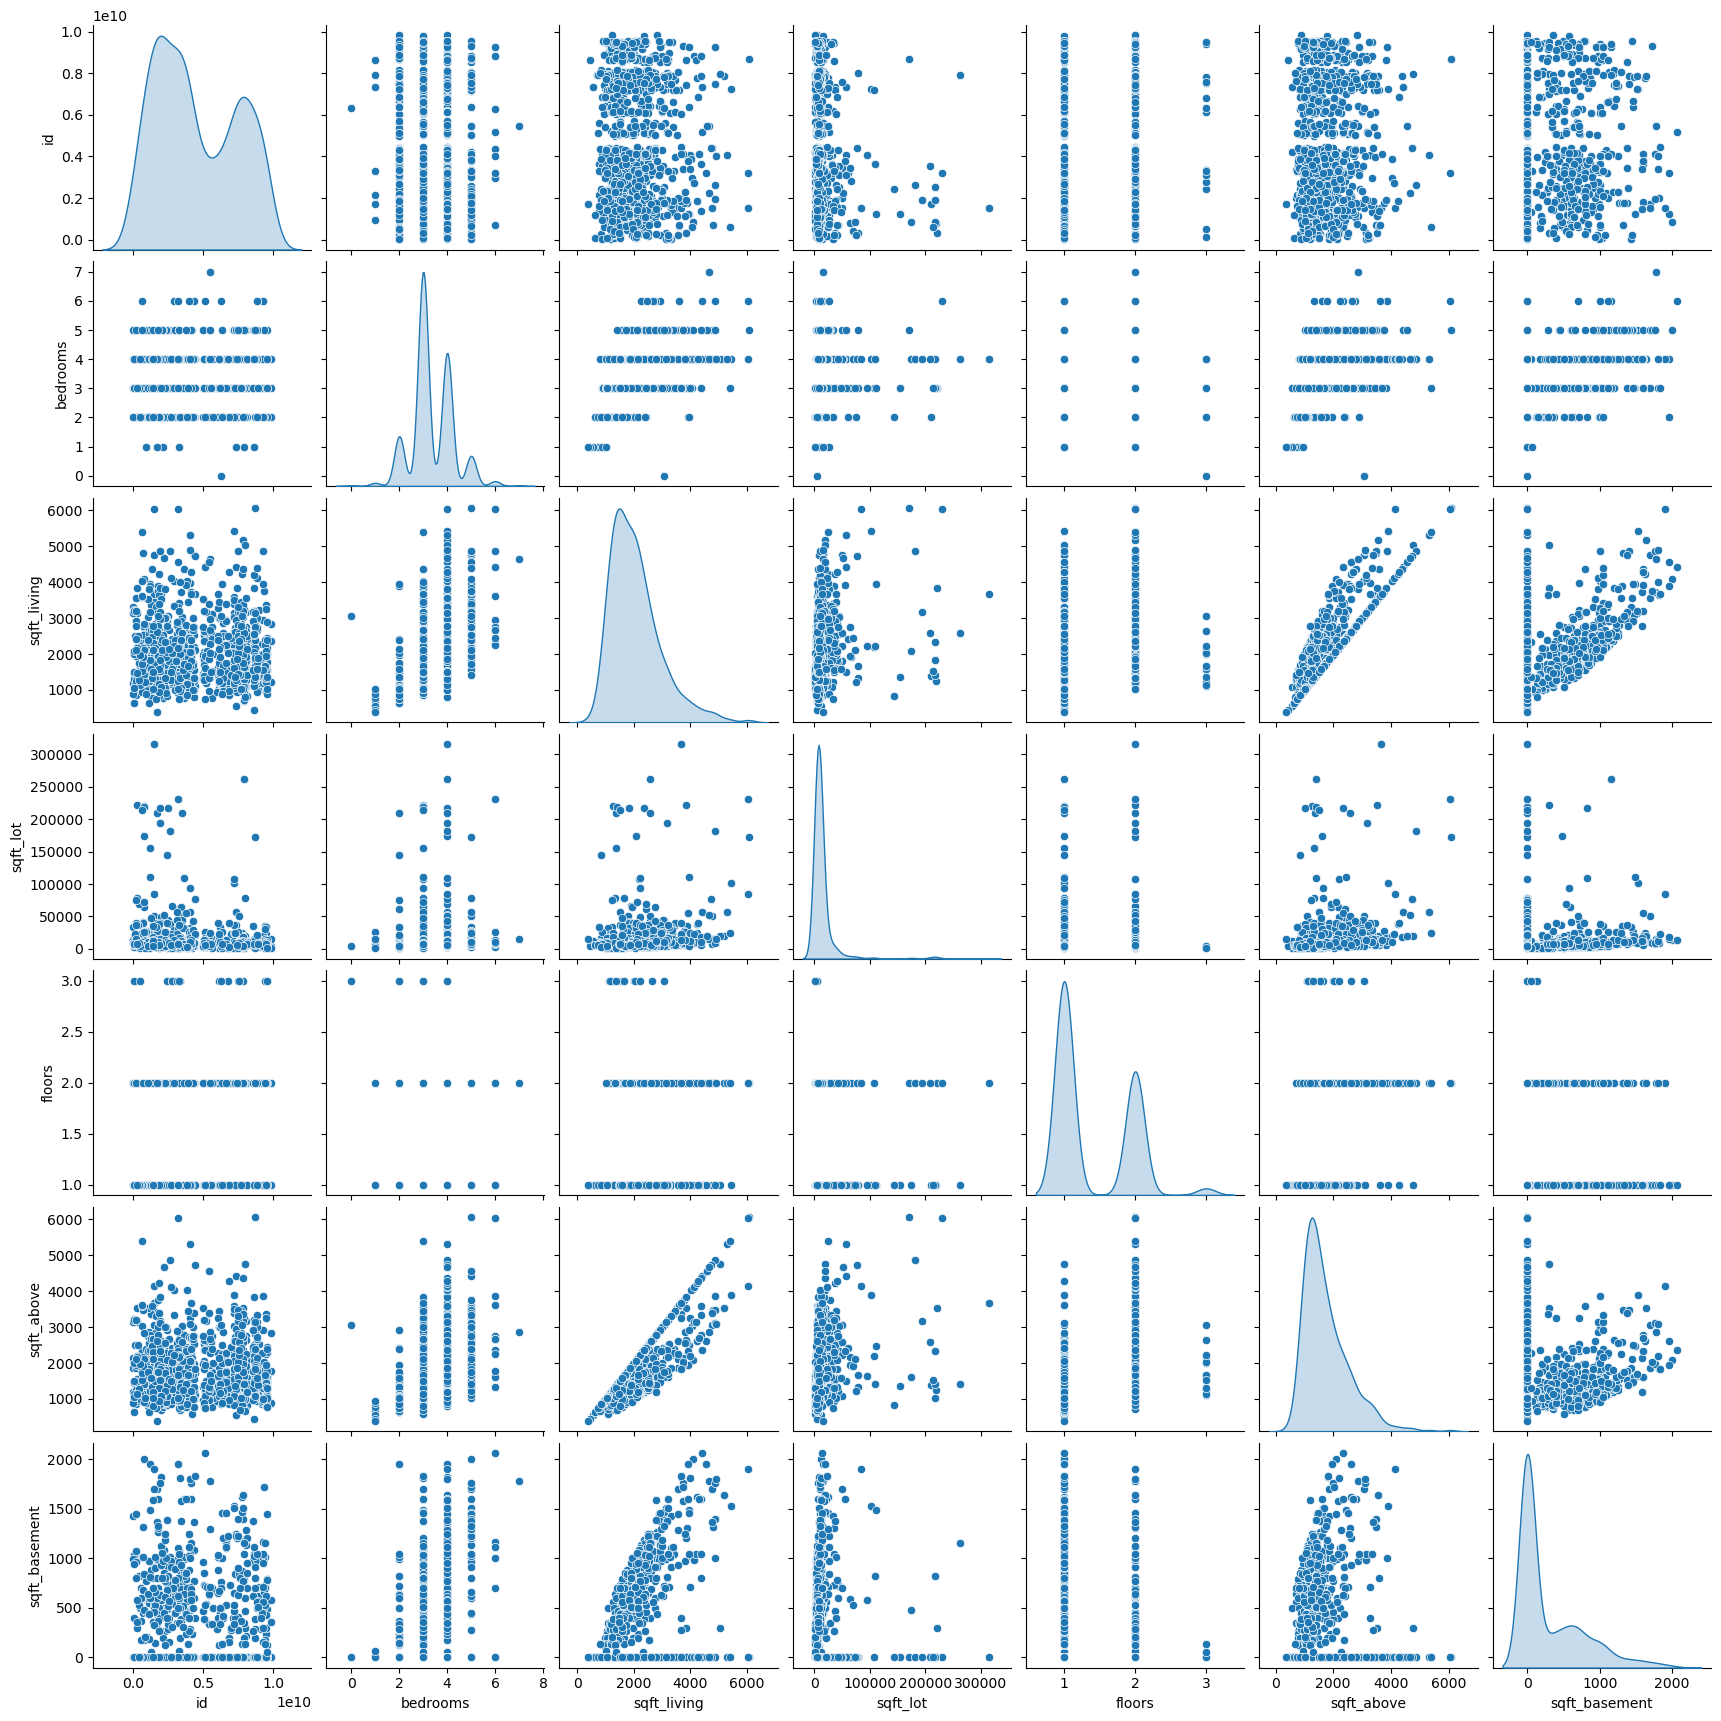

In [43]:
sns.pairplot(df, diag_kind = "kde")

In [44]:
# Selecting input features (X) and target variable (y)
X = df[['bedrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']]
y = df['price']

In [45]:
# scaling the data 

scaler = preprocessing.StandardScaler() 
X = scaler.fit_transform(X)

In [46]:
# Splitting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)



Training set shape: (799, 6) (799,)
Testing set shape: (200, 6) (200,)


In [47]:
# Importing the Multi-Linear Regressor, Decision Tree Regressor, 
# and Support Vector Regressor classes from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


# Now we create instances of the regression models we are going to use
multi_linear_regr = LinearRegression()
Decision_tree_regr = DecisionTreeRegressor()
svr_regr = SVR(kernel = 'linear')

# Now we train each model on the training dataset using the fit method
multi_linear_regr.fit(X_train, y_train)
Decision_tree_regr.fit(X_train, y_train)
svr_regr.fit(X_train, y_train)

SVR(kernel='linear')

In [48]:
# Now we make predictions and we use each trained model to make predictions on 
# the test dataset using the predict method:
multi_linear_pred = multi_linear_regr.predict(X_test)
Decision_tree_pred = Decision_tree_regr.predict(X_test)
svr_pred = svr_regr.predict(X_test)


In [49]:
# Evaluating each model's performance using appropriate regression metrics 
#like Root Mean Squared Error (RMSE) and Coefficient of Determination (R-squared). 

multi_linear_rmse = mean_squared_error(y_test, multi_linear_pred)
multi_linear_r2 = r2_score(y_test, multi_linear_pred)


Decision_tree_rmse = mean_squared_error(y_test, Decision_tree_pred)
Decision_tree_r2 = r2_score(y_test, Decision_tree_pred)

svr_rmse = mean_squared_error(y_test, svr_pred)
svr_r2 = r2_score(y_test, svr_pred)


In [50]:
print('Multi-linear Root Mean Squared Error: %.2f' % multi_linear_rmse)
print('Multi-linear R-squared (Coefficient of Determination: %.2f' % multi_linear_r2)

print(' ')

print('Decision tree regression Root Mean Squared Error: %.2f' % Decision_tree_rmse)
print('Decision tree regression R-squared (Coefficient of Determination: %.2f' % Decision_tree_r2)

print(' ')

print('SVR Root Mean Squared Error: %.2f' % svr_rmse)
print('SVR R-squared (Coefficient of Determination: %.2f' % svr_r2)


Multi-linear Root Mean Squared Error: 47403677816.80
Multi-linear R-squared (Coefficient of Determination: 0.47
 
Decision tree regression Root Mean Squared Error: 109646452938.41
Decision tree regression R-squared (Coefficient of Determination: -0.22
 
SVR Root Mean Squared Error: 92305388857.94
SVR R-squared (Coefficient of Determination: -0.03


The best regression model that fits the data is The Multi-linear Regressor. This model has the lowest RMSE (which indicates lower prediction error), and the highest R-squared value ( which indicates a better fit to the data) compared to the other models.